In [ ]:
!git clone https://git@github.com/NadaAdelMousa/Dry-Beans-Classification.git

fatal: destination path 'Dry-Beans-Classification' already exists and is not an empty directory.


In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#pd.set_option('display.max_rows', None)

In [ ]:
df=pd.read_csv('/content/Dry-Beans-Classification/train.csv',index_col='ID')
df.head()


,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,y
ID,,,,,,,,,,,,,,,,,
0,58238,971.303,397.202654,186.945510,2.124697,0.882317,58977,272.306674,0.604756,0.987470,0.775723,0.685561,0.006820,0.000929,0.469994,0.998595,HOROZ
1,44515,757.601,265.590470,213.967453,1.241266,0.592420,44780,238.071960,0.771745,0.994082,0.974620,0.896387,0.005966,0.002376,0.803510,0.997370,SEKER
2,31662,653.783,239.902428,168.421505,1.424417,0.712136,32034,200.781748,0.801407,0.988387,0.930853,0.836931,0.007577,0.002293,0.700453,0.997737,DERMASON
3,38778,734.020,268.446281,184.061923,1.458456,0.727925,39208,222.201897,0.766137,0.989033,0.904439,0.827733,0.006923,0.002005,0.685142,0.999250,DERMASON
4,42530,775.403,281.212824,193.236878,1.455275,0.726511,43028,232.703412,0.729816,0.988426,0.888895,0.827499,0.006612,0.001912,0.684755,0.996507,SIRA


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10834 entries, 0 to 10833
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             10834 non-null  int64  
 1   Perimeter        10834 non-null  float64
 2   MajorAxisLength  10834 non-null  float64
 3   MinorAxisLength  10834 non-null  float64
 4   AspectRation     10834 non-null  float64
 5   Eccentricity     10834 non-null  float64
 6   ConvexArea       10834 non-null  int64  
 7   EquivDiameter    10834 non-null  float64
 8   Extent           10834 non-null  float64
 9   Solidity         10834 non-null  float64
 10  roundness        10834 non-null  float64
 11  Compactness      10834 non-null  float64
 12  ShapeFactor1     10834 non-null  float64
 13  ShapeFactor2     10834 non-null  float64
 14  ShapeFactor3     10834 non-null  float64
 15  ShapeFactor4     10834 non-null  float64
 16  y                10834 non-null  object 
dtypes: float64(1

In [ ]:
df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000
mean,53095.675189,855.274892,320.036169,202.410342,1.581294,0.750588,53816.205926,253.123583,0.749937,0.987152,0.873647,0.800244,0.006559,0.001718,0.644139,0.995083
std,29542.542580,214.991122,85.961630,45.113965,0.244314,0.091481,29999.710739,59.433080,0.048949,0.004626,0.059344,0.061228,0.001127,0.000593,0.098268,0.004306
min,20420.000000,524.932000,183.601165,129.576207,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.645368,0.002856,0.000564,0.416499,0.947687
25%,36343.500000,703.601250,253.501071,175.927024,1.432985,0.716250,36731.250000,215.113880,0.718778,0.985627,0.833479,0.763378,0.005888,0.001161,0.582747,0.993690
50%,44645.000000,793.739500,296.377365,192.525040,1.550761,0.764314,45148.000000,238.419335,0.760141,0.988290,0.883472,0.801428,0.006643,0.001700,0.642287,0.996397
75%,61295.000000,975.517500,376.068399,217.315195,1.703029,0.809450,62251.500000,279.362162,0.786871,0.990014,0.916883,0.834068,0.007268,0.002169,0.695670,0.997895
max,254616.000000,1985.370000,738.860153,450.926187,2.388873,0.908167,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.009897,0.003665,0.974767,0.999733


In [ ]:
df.isna().sum().sum()

0

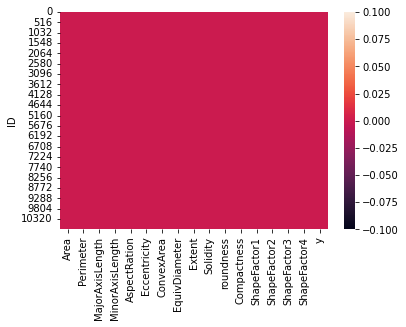

In [ ]:
sns.heatmap(df.isnull())

In [ ]:
df['y'].value_counts()

DERMASON    2837
SIRA        2109
SEKER       1621
HOROZ       1488
CALI        1304
BARBUNYA    1057
BOMBAY       418
Name: y, dtype: int64

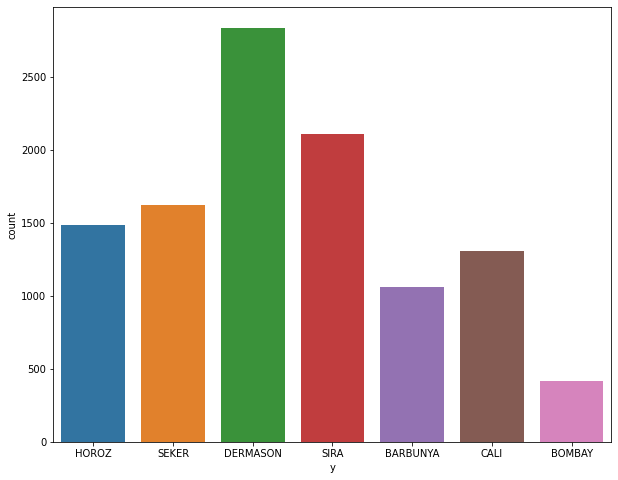

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(x="y", data=df);

In [ ]:
df.shape

(10834, 17)

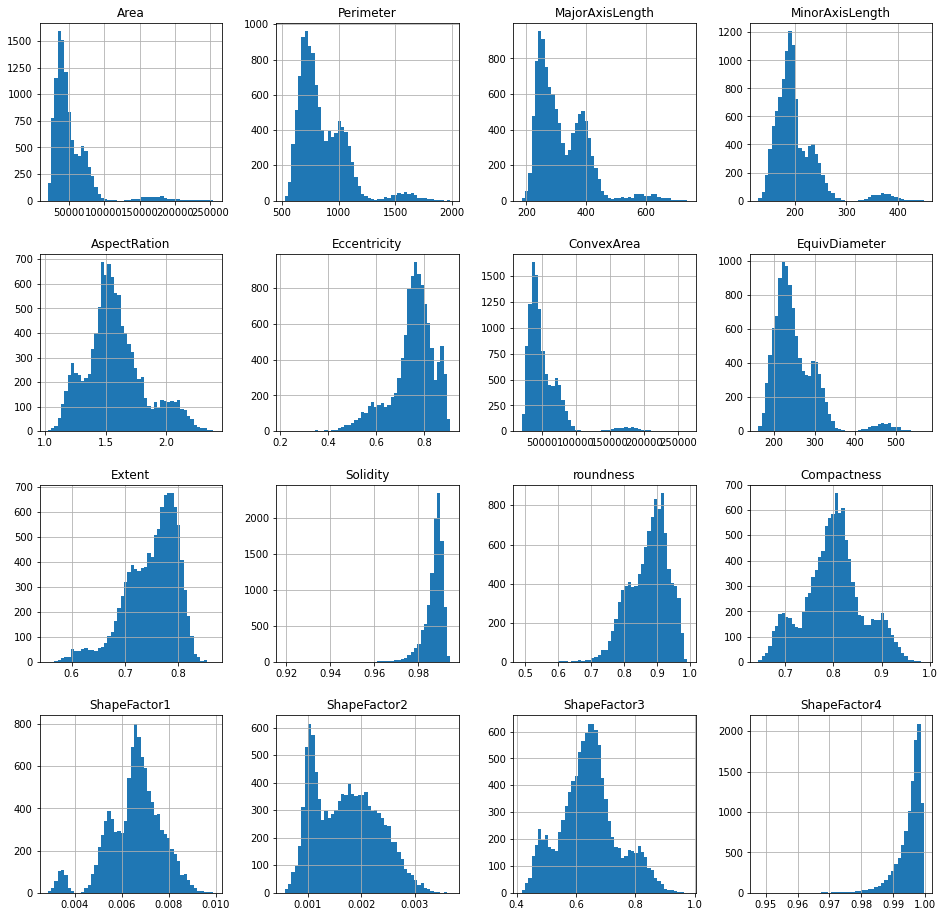

In [ ]:
df.hist(bins=50,figsize=(16,16))
plt.show()

In [ ]:
df.skew()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Area               2.970246
Perimeter          1.650773
MajorAxisLength    1.390286
MinorAxisLength    2.251468
AspectRation       0.589186
Eccentricity      -1.075626
ConvexArea         2.960315
EquivDiameter      1.971378
Extent            -0.900892
Solidity          -2.507634
roundness         -0.659566
Compactness        0.038242
ShapeFactor1      -0.544873
ShapeFactor2       0.292677
ShapeFactor3       0.245589
ShapeFactor4      -2.628540
dtype: float64

In [ ]:
from imblearn.over_sampling import SMOTE
# Resampling the minority class. The strategy can be changed as required.
sm = SMOTE(sampling_strategy='minority', random_state=0)
# Fit the model to generate the data.
oversampled_X, oversampled_Y = sm.fit_resample(df.drop('y', axis=1), df['y'])
oversampled = pd.concat([pd.DataFrame(oversampled_Y), pd.DataFrame(oversampled_X)], axis=1)

In [ ]:
oversampled.shape

(13253, 17)

In [ ]:
oversampled.columns

Index(['y', 'Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4'],
      dtype='object')

In [ ]:
df['y'].value_counts()

DERMASON    2837
SIRA        2109
SEKER       1621
HOROZ       1488
CALI        1304
BARBUNYA    1057
BOMBAY       418
Name: y, dtype: int64

In [ ]:
oversampled['y'].value_counts()

DERMASON    2837
BOMBAY      2837
SIRA        2109
SEKER       1621
HOROZ       1488
CALI        1304
BARBUNYA    1057
Name: y, dtype: int64

In [ ]:

oversampled.replace(['BOMBAY','DERMASON','SIRA','SEKER', 'HOROZ', 'CALI','BARBUNYA'], [0,1,2,3,4,5,6], inplace=True)

In [ ]:
oversampled['y'].unique()

array([4, 3, 1, 2, 6, 5, 0])

In [ ]:
df.columns.tolist()

['Area',
 'Perimeter',
 'MajorAxisLength',
 'MinorAxisLength',
 'AspectRation',
 'Eccentricity',
 'ConvexArea',
 'EquivDiameter',
 'Extent',
 'Solidity',
 'roundness',
 'Compactness',
 'ShapeFactor1',
 'ShapeFactor2',
 'ShapeFactor3',
 'ShapeFactor4',
 'y']

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
dataa = oversampled.copy()
X=dataa.drop(['y'],axis=1).copy()

y = dataa['y']    #target column i.e price range
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

              Specs         Score
6        ConvexArea  5.115174e+08
0              Area  5.048127e+08
1         Perimeter  1.540454e+06
2   MajorAxisLength  5.989513e+05
7     EquivDiameter  4.395485e+05
3   MinorAxisLength  3.399547e+05
4      AspectRation  3.344784e+02
14     ShapeFactor3  1.327931e+02
5      Eccentricity  9.492107e+01
11      Compactness  4.153693e+01


[0.0957701  0.09538698 0.0867808  0.10527688 0.05629088 0.04450206
 0.06921702 0.09050508 0.0110217  0.01389485 0.04276817 0.06170245
 0.07232408 0.06499889 0.06646709 0.02309295]


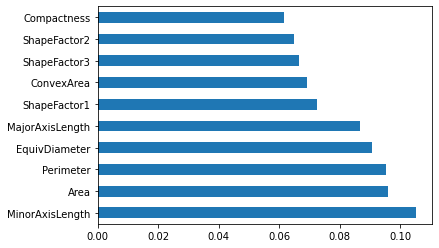

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
dataa = oversampled.copy()
X=dataa.drop(['y'],axis=1).copy()
y = dataa['y'] 
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [ ]:
oversampled.columns

Index(['y', 'Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4'],
      dtype='object')

In [ ]:
#oversampled.drop(['ShapeFactor4','Extent','Solidity','roundness','ShapeFactor2','Eccentricity'], axis=1, inplace=True)

In [ ]:
oversampled.drop(['ConvexArea','Solidity', 'roundness','ShapeFactor4','Extent', 'AspectRation'], axis=1, inplace=True)


In [ ]:
oversampled.shape

(13253, 11)

In [ ]:
X=oversampled.drop(['y'],axis=1).copy()
X.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,Eccentricity,EquivDiameter,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3
0,58238,971.303,397.202654,186.945510,0.882317,272.306674,0.685561,0.006820,0.000929,0.469994
1,44515,757.601,265.590470,213.967453,0.592420,238.071960,0.896387,0.005966,0.002376,0.803510
2,31662,653.783,239.902428,168.421505,0.712136,200.781748,0.836931,0.007577,0.002293,0.700453
3,38778,734.020,268.446281,184.061923,0.727925,222.201897,0.827733,0.006923,0.002005,0.685142
4,42530,775.403,281.212824,193.236878,0.726511,232.703412,0.827499,0.006612,0.001912,0.684755


In [ ]:
X.shape

(13253, 10)

In [ ]:
y=oversampled['y'].copy()
y.shape


(13253,)

In [ ]:
y=y.values
y=y.reshape((-1,1))
y.shape

(13253, 1)

In [ ]:
from sklearn.preprocessing import StandardScaler

sScalar=StandardScaler()    
X_Scaled= sScalar.fit_transform(X) #scale train    

In [ ]:
################################################################
from sklearn.decomposition import PCA
pca = PCA(n_components=7)
pca.fit(X_Scaled)
pca_features = pca.transform(X_Scaled)
print(pca_features.shape)





###################################################################

(13253, 7)


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(pca_features, y, test_size=0.2,stratify=y, random_state=0)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler,StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
regressor=LogisticRegression(random_state=0)
regressor.fit(X_train,y_train)

print(regressor.score(X_train,y_train))
print(regressor.score(X_test,y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9216185625353707
0.926442851754055


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-2,activation='relu',early_stopping=True, hidden_layer_sizes=(8,6), random_state=0)

MLP_model=clf.fit(X_train,y_train)

print(MLP_model.score(X_train, y_train))
print(MLP_model.score(X_test,y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9292586304470855
0.9290833647680121


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [ ]:
model = RandomForestClassifier(max_depth=10, random_state=0, min_samples_leaf=10, 
                            max_features=0.11, 
                            n_estimators=200)
RF_pipeline=model.fit(X_train, y_train)

print(RF_pipeline.score(X_train, y_train))
print(RF_pipeline.score(X_test,y_test))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


0.9447274099226561
0.9336099585062241


In [ ]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss',random_state=0)

xgb_pipeline=xgb_model.fit(X_train, y_train)
print(xgb_pipeline.score(X_train, y_train))
print(xgb_pipeline.score(X_test,y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9499151103565365
0.9354960392304791


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

dt = DecisionTreeClassifier(max_depth=10, random_state=0)
ada = AdaBoostClassifier(base_estimator=dt, 
n_estimators=200, random_state=0)

ada_model=ada.fit(X_train, y_train)
print(ada_model.score(X_train, y_train))
print(ada_model.score(X_test,y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1.0
0.9373821199547341


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(max_depth=5, 
            n_estimators=200,
            random_state=0)

gn_model=gb.fit(X_train,y_train)
print(gn_model.score(X_train, y_train))
print(gn_model.score(X_test,y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9999056781739295
0.9358732553753301


In [ ]:
# Import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier

# Instantiate sgbr
sgbr = GradientBoostingClassifier(
            max_depth=6, 
            subsample=0.9,
            max_features=0.75,
            n_estimators=200,                                
            random_state=0)
sgbr_model=sgbr.fit(X_train,y_train)
print(gn_model.score(X_train, y_train))
print(gn_model.score(X_test,y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9999056781739295
0.9358732553753301


In [ ]:
df_test=pd.read_csv('/content/Dry-Beans-Classification/test.csv',index_col='ID')
df_test.head()


,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
ID,,,,,,,,,,,,,,,,
10834,57659,955.434,387.757607,196.625782,1.972059,0.861896,60188,270.949661,0.620790,0.957982,0.793735,0.698760,0.006725,0.000989,0.488266,0.962889
10835,28772,630.362,229.990785,159.609367,1.440960,0.719993,29127,191.399185,0.767458,0.987812,0.909913,0.832204,0.007994,0.002365,0.692563,0.997956
10836,54677,911.022,308.853903,226.398571,1.364204,0.680198,55858,263.850182,0.753013,0.978857,0.827860,0.854288,0.005649,0.001856,0.729808,0.995607
10837,24827,578.304,214.192699,147.788172,1.449322,0.723831,25121,177.794033,0.716508,0.988297,0.932871,0.830066,0.008627,0.002526,0.689009,0.998596
10838,141850,1432.847,524.923471,346.910920,1.513136,0.750492,143680,424.981211,0.804617,0.987263,0.868240,0.809606,0.003701,0.000981,0.655462,0.991803


In [ ]:
df_test.columns

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4'],
      dtype='object')

In [ ]:
#'ShapeFactor4','Extent','Solidity','roundness','ShapeFactor2','Eccentricity'
df_test.drop(['ConvexArea','Solidity', 'roundness','ShapeFactor4','Extent', 'AspectRation' ], axis=1, inplace=True)

In [ ]:
df_test.shape

(2709, 10)

In [ ]:
df_test = pd.DataFrame(sScalar.transform(df_test.values), columns=df_test.columns,index=df_test.index)
df_test.head()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


,Area,Perimeter,MajorAxisLength,MinorAxisLength,Eccentricity,EquivDiameter,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3
ID,,,,,,,,,,
10834,-0.321260,-0.097526,0.131875,-0.474250,1.277140,-0.217542,-1.772035,0.465564,-0.894231,-1.688768
10835,-0.847832,-1.034206,-1.051953,-0.943043,-0.404348,-1.008763,0.587889,1.266340,1.268766,0.561587
10836,-0.375618,-0.225497,-0.460191,-0.097194,-0.875891,-0.288155,0.978446,-0.213863,0.468399,0.971844
10837,-0.919744,-1.184209,-1.170496,-1.092752,-0.358870,-1.144082,0.550081,1.666458,1.522476,0.522441
10838,1.213429,1.278118,1.161121,1.429029,-0.042942,1.314479,0.188253,-1.443637,-0.907223,0.152914


In [ ]:
pca_test_features = pca.transform(df_test)
print(pca_test_features.shape)


(2709, 7)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but PCA was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
y_pred_mlp=sgbr_model.predict(pca_test_features)

In [ ]:
y_pred_mlp

array([4, 1, 6, ..., 4, 1, 2])

In [ ]:
#'y_pred_xgb=np.where([0,1,2,3,4,5,6],['BOMBAY','DERMASON','SIRA','SEKER', 'HOROZ', 'CALI','BARBUNYA'])
lst_xgb=[]
for el in y_pred_mlp:
  
  if(el==0):
    lst_xgb.append('BOMBAY')
  elif el==1:
      lst_xgb.append('DERMASON')
  elif el==2:
      lst_xgb.append('SIRA')

  elif el==3:
      lst_xgb.append('SEKER')

  elif el==4:
      lst_xgb.append('HOROZ')

  elif el==5:
      lst_xgb.append('CALI')

  else:
      lst_xgb.append('BARBUNYA')    



In [ ]:
last_test=pd.read_csv('/content/data_test.csv',index_col='ID')
y_label=last_test['y']
y_label=y_label.tolist()
type(y_label)

list

In [ ]:
from sklearn.metrics import confusion_matrix
print(print(confusion_matrix(y_label, lst_xgb)))

[[245   1  14   0   0   1   2]
 [  0 104   0   0   0   0   0]
 [  8   1 308   0   5   1   1]
 [  0   0   0 672   1   5  30]
 [  0   0   7   0 352   0   4]
 [  0   0   0   4   0 392   9]
 [  0   0   3  40   1   5 493]]
None


In [ ]:
acc=0
for i in range(len(lst_xgb)):
  if(lst_xgb[i]==y_label[i]):
    acc+=1

print(acc/len(y_label))   

0.9472129937246216


In [ ]:
out_pred = pd.DataFrame({'ID': df_test.index,
                       'y': lst_xgb})
out_pred.to_csv('submission_v4_xgb.csv', index=False)